# Crop DISEASE CLASSIFICATION

## Importing necessary libraries

Let's import required modules

In [1]:
import os                       # for working with files
import numpy as np              # for numerical computationss
import pandas as pd             # for working with dataframes
import torch                    # Pytorch module 
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader # for dataloaders 
from PIL import Image           # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors 
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model

%matplotlib inline

# Exploring the data

In [2]:
# data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
data_dir = "../PLANT_DISEASE_data/Plant_Diseases_Dataset/Plant_Diseases_Dataset"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")
# List all disease categories in the training directory
diseases = os.listdir(train_dir)

In [3]:
# printing the disease names
print(diseases)

['Corn_(maize)___Common_rust_', 'Potato___Late_blight', 'Pepper,_bell___healthy', 'Tomato___Leaf_Mold', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Squash___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Raspberry___healthy', 'Apple___Black_rot', 'Potato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Potato___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Strawberry___healthy', 'Apple___Apple_scab', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Tomato___Late_blight', 'Grape___healthy', 'Soybean___healthy', 'Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'A

In [4]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 38


In [5]:
# Initialize lists and counters
plants = []
NumberOfDiseases = 0
# Iterate through each disease category
for plant in diseases:
    # Extract the plant name and add to the list if not already present
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    # Count the number of disease categories (excluding healthy)
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

The above cell extract the number of unique plants and number of unique diseases

In [6]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Corn_(maize)', 'Potato', 'Pepper,_bell', 'Tomato', 'Blueberry', 'Cherry_(including_sour)', 'Squash', 'Orange', 'Raspberry', 'Apple', 'Grape', 'Peach', 'Strawberry', 'Soybean']


In [7]:
# number of unique plants
print("Number of plants: {}".format(len(plants)))

Number of plants: 14


In [8]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


the Dataset here have images of leaves of 14 plants and while excluding healthy leaves, we have 26 types of images that show a particular disease in a particular plant.

In [9]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Corn_(maize)___Common_rust_                                  1907
Potato___Late_blight                                         1939
Pepper,_bell___healthy                                       1988
Tomato___Leaf_Mold                                           1882
Blueberry___healthy                                          1816
Cherry_(including_sour)___healthy                            1826
Squash___Powdery_mildew                                      1736
Orange___Haunglongbing_(Citrus_greening)                     2010
Raspberry___healthy                                          1781
Apple___Black_rot                                            1987
Potato___Early_blight                                        1939
Tomato___Septoria_leaf_spot                                  1745
Potato___healthy                                             1824
Cherry_(including_sour)___Powdery_mildew                     1683
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Peach___Bacterial_spot                                       1838
Strawberry___healthy                                         1824
Apple___Apple_scab                                           2016
Peach___healthy                                              1728
Pepper,_bell___Bacterial_spot                                1913
Grape___Esca_(Black_Measles)                                 1920
Tomato___Late_blight                                         1851
Grape___healthy                                              1692
Soybean___healthy                                            2022
Apple___healthy                                              2008
Corn_(maize)___Northern_Leaf_Blight                          1908
Corn_(maize)___healthy                                       1859
Tomato___Spider_mites Two-spotted_spider_mite                1741
Tomato___Bacterial_spot                                      1702
Tomato___healthy                                             1926
Tomato___Early_blight                                        1920
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Apple___Cedar_apple_rust                                     1760
Tomato___Target_Spot                                         1827
Grape___Black_rot                                            1888
Strawberry___Leaf_scorch                                     1774

#### Visualizing the above information on a graph

Text(0.5, 1.0, 'Images per class of Crop disease')

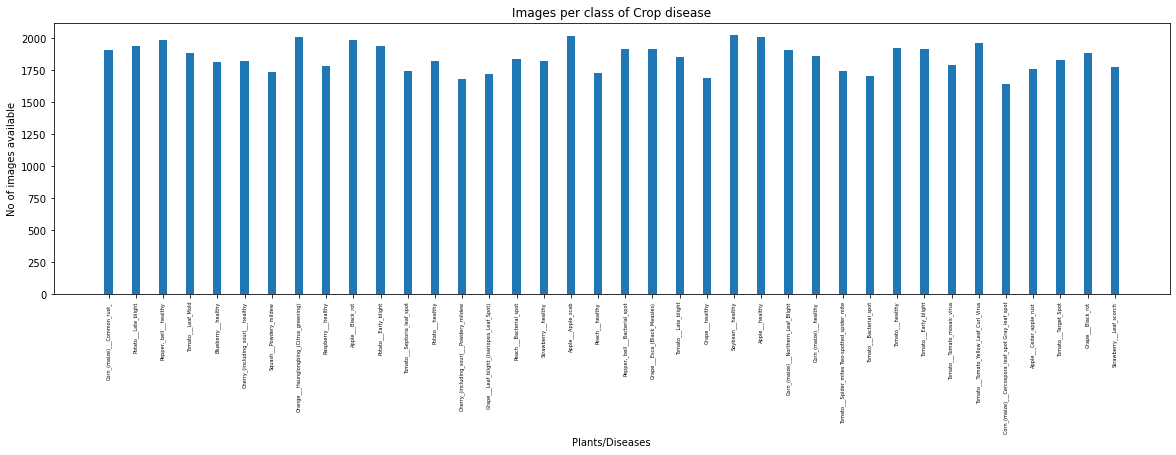

In [10]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per class of Crop disease')

#### Images available for training

In [11]:
# Count the total number of training images
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


# Data Preparation for training

In [12]:
import os

data_dir = "../PLANT_DISEASE_data/Plant_Diseases_Dataset/Plant_Diseases_Dataset"
train_dir = os.path.join(data_dir, "train")
valid_dir = os.path.join(data_dir, "valid")

print("Train directory exists:", os.path.exists(train_dir))
print("Valid directory exists:", os.path.exists(valid_dir))

Train directory exists: True
Valid directory exists: True


In [13]:
print("Files in valid directory:")
for root, dirs, files in os.walk(valid_dir):
    for file in files:
        print(file)

Files in valid directory:
RS_Rust 2153.JPG
RS_Rust 2013.JPG
RS_Rust 1934_flipLR.JPG
RS_Rust 2082.JPG
RS_Rust 1660.JPG
RS_Rust 2653.JPG
RS_Rust 2240_flipLR.JPG
RS_Rust 1965.JPG
RS_Rust 2376.JPG
RS_Rust 2630.JPG
RS_Rust 2108_flipLR.JPG
RS_Rust 1653.JPG
RS_Rust 1840_flipLR.JPG
RS_Rust 1577_flipLR.JPG
RS_Rust 1975.JPG
RS_Rust 2371_flipLR.JPG
RS_Rust 1795_flipLR.JPG
RS_Rust 2512_flipLR.JPG
RS_Rust 2410.JPG
RS_Rust 2637.JPG
RS_Rust 1989.JPG
RS_Rust 2457.JPG
RS_Rust 1598_flipLR.JPG
RS_Rust 2367.JPG
RS_Rust 1579.JPG
RS_Rust 2270.JPG
RS_Rust 2608_flipLR.JPG
RS_Rust 2186_flipLR.JPG
RS_Rust 2143_flipLR.JPG
RS_Rust 2623.JPG
RS_Rust 2756_flipLR.JPG
RS_Rust 2564.JPG
RS_Rust 1803_flipLR.JPG
RS_Rust 2638_flipLR.JPG
RS_Rust 2769.JPG
RS_Rust 1607.JPG
RS_Rust 2471_flipLR.JPG
RS_Rust 2318.JPG
RS_Rust 1845.JPG
RS_Rust 2132_flipLR.JPG
RS_Rust 2411_flipLR.JPG
RS_Rust 2489_flipLR.JPG
RS_Rust 1583_flipLR.JPG
RS_Rust 1981.JPG
RS_Rust 2260.JPG
RS_Rust 2661.JPG
RS_Rust 1984.JPG
RS_Rust 2716_flipLR.JPG
RS_Rust 261

fc759d3f-64c7-4e45-9a0c-5a2f07fd1055___RS_LB 3030_180deg.JPG
49e55f8e-4d44-452c-8e59-d4c4f0ae1085___RS_LB 4333_flipTB.JPG
75a1ae7b-9b93-4a9f-9eca-70b4b9e9f5ff___RS_LB 4739_flipTB.JPG
ec88be1e-7e05-4fa4-b456-529d7f1bf81c___RS_LB 3922_flipTB.JPG
72e10017-f8a6-4813-8036-0cde4dad6057___RS_LB 4666_180deg.JPG
794fae1d-55b2-4275-8fce-174728963813___RS_LB 2841_180deg.JPG
d8ef0e69-3dfc-4d13-8d49-a44fa9cfa62e___RS_LB 4140_flipTB.JPG
bf07f2b7-6ab3-4192-a418-ecabc32a11fe___RS_LB 2576.JPG
ad2396a9-306e-4ca9-88dc-56b2bde77c6b___RS_LB 2755_180deg.JPG
65bab626-51a1-4d16-ab9c-ddd25f4e2e33___RS_LB 4927_180deg.JPG
17515ff9-075f-45a2-b8e6-1b8ba25c293d___RS_LB 4980_flipTB.JPG
44722935-fb60-4ecf-8503-f8258aa4e3e7___RS_LB 3225_flipTB.JPG
e0460bd7-100c-411f-ae0b-f69bfe360313___RS_LB 5310_180deg.JPG
b65fddcf-cc40-4632-a0c4-70fff2f68009___RS_LB 4481_180deg.JPG
dbad8fb5-90a0-4bcc-902e-7b7b632d0233___RS_LB 4036_180deg.JPG
de54e40d-4c5f-48d9-9b6d-bc96bde09898___RS_LB 4086_180deg.JPG
c6ecc36c-1886-4d2d-89aa-0e9e9dc

eab7f198-a04b-4e25-b329-41e7666d1fde___Crnl_L.Mold 6773_180deg.JPG
c1672351-bc9d-46b1-b9bc-332f9a9505bb___Crnl_L.Mold 8819_180deg.JPG
c037b9ad-fa8f-4bbf-a38f-ec0cd6db860d___Crnl_L.Mold 9024_180deg.JPG
452bc068-6862-4715-a724-a4057d4155ee___Crnl_L.Mold 6866_180deg.JPG
760c9629-46ea-41dc-8a59-5ddff5352e86___Crnl_L.Mold 8635_flipTB.JPG
5673859a-ec42-4fc0-80ec-44cc3203c7be___Crnl_L.Mold 8768_flipTB.JPG
2715ba21-6d2a-485a-bd10-ea6e8177250d___Crnl_L.Mold 6863_flipTB.JPG
8989f67e-ccc0-4d37-a950-59d3a69856fe___Crnl_L.Mold 7175_flipTB.JPG
50f3f827-c254-4de3-a7d3-0a5d755367fc___Crnl_L.Mold 8733.JPG
ff01be71-2cc9-4e83-b907-81c21d31983b___Crnl_L.Mold 9117_flipTB.JPG
706355a7-3ca5-4a79-b946-6fecf0b17277___Crnl_L.Mold 8990_flipTB.JPG
da6cc51a-6ba2-4b1d-aa4f-5d699860da6b___Crnl_L.Mold 6767_flipTB.JPG
110d3ff1-96ea-43f2-96cb-ac57d0b7dd6b___Crnl_L.Mold 6738.JPG
fe0bcd7f-a7de-4155-95a5-79043190eef7___Crnl_L.Mold 7030_flipTB.JPG
02a29ab9-8cba-47a0-bc2f-e7af7dbae149___Crnl_L.Mold 7165.JPG
73c3f88e-6802-4a

cbb4bd24-9572-4235-a9c1-e6b73118b7d5___JR_HL 4120_180deg.JPG
84807b4a-f76a-4ebf-a78a-ec9444197c55___JR_HL 9786_flipTB.JPG
ece7b2cf-6c7f-4616-a1d1-eb4061ae9a45___JR_HL 4119_180deg.JPG
06904803-b778-4d54-b7ac-fd3f28cc82d9___JR_HL 9820_180deg.JPG
a52b26ec-29a5-4bb6-b3e4-f7599240e0d3___JR_HL 4021_flipTB.JPG
e6b262b1-e3ab-483e-93fa-6da710d6606a___JR_HL 9488.JPG
b8eb52cb-27de-4707-b089-5b80f550adb1___JR_HL 9676_flipTB.JPG
b4035665-67f0-4fce-857a-10b40aca7cd9___JR_HL 4009.JPG
b4ac3179-6fd4-4b2a-bf8c-479de4348ff4___JR_HL 9535_180deg.JPG
f5284eab-9540-4512-b363-1cb8a96123c2___JR_HL 9594_flipTB.JPG
32c38f0d-bc33-4579-b0d0-76305106d325___JR_HL 4291.JPG
21d09e46-a1f7-447b-8b15-2e48fb914825___JR_HL 9593_flipTB.JPG
c3101d4e-19b3-4959-92a4-b1b8c88d0bec___JR_HL 3994_180deg.JPG
02b90e70-80a6-415d-b6a8-07e22dead5c4___JR_HL 9892.JPG
bcbbda77-7534-484c-8f5f-d913a370714a___JR_HL 4302.JPG
daaa7f78-5f20-4e6e-9c18-1c67d6218625___JR_HL 9621_180deg.JPG
2861b3da-c5e4-4aeb-8f1e-0d1861bf50c1___JR_HL 9829.JPG
18dd1

fd993f51-4411-4896-81a4-757e71e0b773___CREC_HLB 5495.JPG
b0dc0c7c-4a8c-4864-bc8a-776ccfe98593___CREC_HLB 4761.JPG
ff2954a1-e993-447a-a6f9-e85ec9d93533___CREC_HLB 6533.JPG
d764fdb2-3c93-4f23-afec-1759b1d241a6___UF.Citrus_HLB_Lab 9902.JPG
ad4cf890-17d5-4681-8f20-da03579ed3a6___CREC_HLB 5276.JPG
e285f390-ad89-41d7-871a-227443caa4c6___CREC_HLB 4264.JPG
eec68044-4ca3-4acf-b3e6-dafc87603e78___CREC_HLB 7919.JPG
827839bf-aed2-4263-8d37-d16d164c32b9___CREC_HLB 7069.JPG
77349715-4353-4b96-8795-7e8b058d3b97___CREC_HLB 5339.JPG
d0540dc4-b285-4220-a206-ab358bf4cf31___CREC_HLB 4038.JPG
b61c27c2-1e83-4737-97b2-80dfe0058705___CREC_HLB 6907.JPG
82055f8c-531b-4c89-b191-960cb07f75cf___CREC_HLB 6556.JPG
b12fb3c5-dc64-40ec-82ac-e9bc6383a6a5___UF.Citrus_HLB_Lab 0985.JPG
a2d8169e-863a-49bd-9bbd-d7959a0d2f46___UF.Citrus_HLB_Lab 0522.JPG
87880f70-3b48-40ff-95d2-22935888af90___UF.Citrus_HLB_Lab 1131.JPG
cbb3a4f0-f268-450c-8f2f-9c498079065c___UF.Citrus_HLB_Lab 1462.JPG
f1e2f99a-f4d7-4ed8-a4e2-5f9d7428ac73___CREC

ade9c2ca-cc09-41b0-8eb9-9eb9fdf3b393___CREC_HLB 6638.JPG
d986cdcb-b078-4185-87d7-189d9904b106___CREC_HLB 4966.JPG
18488536-6f53-43db-8d2e-f12267b456f5___CREC_HLB 6566.JPG
f30ef44d-9d1c-49b7-ae07-2bbf25f19dcc___UF.Citrus_HLB_Lab 9740.JPG
798621f1-143f-4f24-828d-4de0f9342634___CREC_HLB 6412.JPG
c6ada380-c87d-4826-8e96-9b15a3fd43ce___UF.Citrus_HLB_Lab 0439.JPG
c4220f81-04e1-41f6-9387-a317df5f0f99___UF.Citrus_HLB_Lab 1281.JPG
336112e8-bf6f-44e5-b567-752fd89885be___CREC_HLB 6444.JPG
df5d63fb-d270-459b-9798-ad680374ad1a___UF.Citrus_HLB_Lab 1668.JPG
f7d6a1dd-474e-44d8-8fbd-461ad7f71dbf___UF.Citrus_HLB_Lab 1523.JPG
eb404af9-6f23-4dcf-b21b-8f1473fbb0d8___CREC_HLB 4150.JPG
89921bb6-15b2-4db1-9723-15edf6b0b52b___CREC_HLB 5505.JPG
d781a3ce-86ef-4f8b-bf21-8a035b2791c3___UF.Citrus_HLB_Lab 9815.JPG
c1df1229-3129-4f9d-a07c-a483eb57ba1d___CREC_HLB 6456.JPG
e9eefed2-d9dd-4286-9701-7c192f8839f9___CREC_HLB 5405.JPG
c36ded99-e09c-4464-8380-44fd25513240___CREC_HLB 4630.JPG
f350c7d8-2bc9-4ea1-9523-be47e42164

0c7c7992-fb1c-444b-b226-69de186cea14___JR_FrgE.S 8627_270deg.JPG
d240fec5-9b1e-4b36-a7df-d0007d0ebfcb___JR_FrgE.S 2929_new30degFlipLR.JPG
9db24caa-7d1e-4b4d-a5fd-ddc794e48ec4___JR_FrgE.S 2980_90deg.JPG
7504315d-b8fb-4b7d-a293-2e224968ab30___JR_FrgE.S 8697_new30degFlipLR.JPG
a2eb846a-da47-4d4d-97db-d954a20bb22a___JR_FrgE.S 2868_90deg.JPG
b84f9317-4054-4796-b36a-1dffcb871956___JR_FrgE.S 8725.JPG
f63c8d11-234c-4ff4-bd81-5c3947503038___JR_FrgE.S 3085_90deg.JPG
727f3a92-f43b-4388-84ff-3865ee745b42___JR_FrgE.S 3000_90deg.JPG
fe6a81b9-9198-4db7-82df-0802913716e1___JR_FrgE.S 2976_270deg.JPG
9db01900-2a71-4acc-a9e8-f1a462707cf8___JR_FrgE.S 3004.JPG
7375bf36-7a8e-4fc5-8ee8-0bee7bfb3574___JR_FrgE.S 2874_new30degFlipLR.JPG
14896f6f-ae86-4879-958b-7422b957e104___JR_FrgE.S 8768_270deg.JPG
29f71a36-3389-47c8-94ad-484818e677f2___JR_FrgE.S 8607_270deg.JPG
169b07da-12eb-4a6d-9b24-f37692ca923d___JR_FrgE.S 8636_90deg.JPG
f079c46a-6614-45ac-8ab6-187d126609e5___JR_FrgE.S 2767_90deg.JPG
788885e1-18b4-44a0-af

a38a8891-5883-4cfd-9718-2566dccfa114___JR_FrgE.S 8670_270deg.JPG
bf3eaad3-aa22-4425-88f0-339be0f39059___JR_FrgE.S 2933_new30degFlipLR.JPG
f9c0a3a9-a08e-4b1d-baab-93fdc7fb2690___JR_FrgE.S 2896.JPG
62cc4916-2674-472e-a48c-0ce986aa85e3___JR_FrgE.S 8793.JPG
a0508a43-b31b-4d26-9ed0-96b04400b187___JR_FrgE.S 3060_90deg.JPG
b6850718-a674-4eb2-9a5b-bb7ae5f32ce8___JR_FrgE.S 8602_new30degFlipLR.JPG
aed39453-1ff0-44b9-90e8-7cabf883340e___JR_FrgE.S 2873.JPG
75e9b8ed-e579-469c-96ec-d964fc7d4d90___JR_FrgE.S 8581.JPG
1a9f6dfb-fdf4-43b4-9fb4-b7a809b49b9d___JR_FrgE.S 2765_new30degFlipLR.JPG
788885e1-18b4-44a0-af85-226e66265220___JR_FrgE.S 8574_270deg.JPG
9d8d2d78-8faf-4a85-90b6-2a2ffed94d83___JR_FrgE.S 8721_270deg.JPG
bb1f1f60-cd69-4661-aca2-bcb19eb1def2___JR_FrgE.S 8785_270deg.JPG
d34cb771-c15b-41c4-aa43-ecae33df010b___JR_FrgE.S 8631_new30degFlipLR.JPG
f4f0b458-01c4-48ad-a600-fe3e7fb47b36___JR_FrgE.S 8730_270deg.JPG
a31cafc7-a39b-4689-83bd-4becd49ab74b___JR_FrgE.S 8760_90deg.JPG
6c38e74e-6926-45f1-a1cf

6e28615d-e735-42e3-8eef-96bf10a4908d___Matt.S_CG 1514.JPG
817905e4-d07e-43d3-8b2a-d7819a62abaa___Matt.S_CG 7729.JPG
f7c80186-a4f8-4c18-af38-106b81f23bbd___Matt.S_CG 7658.JPG
b642f549-f9f4-4ac4-b8a6-9b060f88b484___JR_Sept.L.S 2597.JPG
325ed9c5-08df-49cd-9317-1e3364a3687e___Matt.S_CG 7773.JPG
9875f865-913e-4afa-a0f7-31395c7eab75___Matt.S_CG 2470.JPG
ab242fd5-a0d8-4080-b2e1-15bc475c13c0___JR_Sept.L.S 2713.JPG
502e3bfa-f315-4be7-988f-be4b495cf8c5___Matt.S_CG 7640.JPG
14af00c3-f76a-4789-b58b-049bbf8ea6a6___JR_Sept.L.S 2633.JPG
422a0165-cc1b-4fb5-ab34-d0fe610fb0df___Matt.S_CG 0672.JPG
fb6bea39-f361-457c-b73e-fe3b2dbe6259___Matt.S_CG 2786.JPG
046a86f0-bdae-438b-9c1f-b840c706f409___JR_Sept.L.S 8530.JPG
3b8e8f98-bbc7-446d-82a9-5130e10f1b4a___Matt.S_CG 6618_flipTB.JPG
086f38cc-ea15-4625-aa96-9a74c65f7f7f___Matt.S_CG 6713.JPG
c311dca2-18ca-4304-b356-a2764d8322d2___Matt.S_CG 7801.JPG
fae75392-41a3-4363-b073-32f20bc1cc68___Keller.St_CG 1999.JPG
d0262a47-cb25-4411-a26c-8e838e1c288e___Matt.S_CG 6827.

e59c82e1-d055-4876-87dd-1a2f7d1cfa11___Matt.S_CG 7804.JPG
af9854ba-74f8-4e12-a24a-dd166484ff6b___Matt.S_CG 0696.JPG
9604c3d8-1ccd-4aea-8e31-b90ad17bdae1___JR_Sept.L.S 8406.JPG
a39b7724-9f6b-4d58-a80c-d9dcea99defe___Matt.S_CG 6184.JPG
bcf2f5b8-8788-4ba2-a510-1174c00e76e3___Matt.S_CG 1619.JPG
0b4886e5-a065-44c1-aa19-bd166922d3de___JR_Sept.L.S 8498.JPG
33730016-a830-406f-b969-c50f70adf1df___JR_Sept.L.S 2530.JPG
72f326dd-6a14-436f-968e-9d5083114444___Matt.S_CG 6880.JPG
a8b5f14e-661f-44dc-b947-0b2130e313a1___Matt.S_CG 6878.JPG
3a89c017-4b4b-4f64-a018-05c98a2fa611___Matt.S_CG 1219_flipTB.JPG
b70775c5-59bc-4204-af05-a420ef373667___JR_Sept.L.S 2693.JPG
f9fca14e-8b3c-4f85-aaa9-e8e0e8c49aa9___Matt.S_CG 7684.JPG
63f2b877-9787-4da3-af27-350609736524___Matt.S_CG 2863.JPG
d5daea6b-a0cf-4a40-9cef-3cb43c63f6a9___Matt.S_CG 7776.JPG
f6fc8ed7-225e-41a9-8d22-af61401a60b9___Matt.S_CG 6506.JPG
eefa43ba-728d-42e7-96c3-a032c9542f94___Matt.S_CG 7508.JPG
cfeccc25-2247-486f-aad0-f0cbec4d3fc7___Matt.S_CG 6655.JPG

4c756b73-5e7d-40ec-9b36-1866c49f2e43___FREC_Pwd.M 5156.JPG
dea9ce8a-30b3-47cd-bb96-29e648896c8f___FREC_Pwd.M 4947_flipLR.JPG
6b5ee115-cd03-47de-b7f3-21490d1c2548___FREC_Pwd.M 5102.JPG
d46523ec-cfbe-42dd-a60e-79e2e58598bd___FREC_Pwd.M 4506_flipLR.JPG
09c9fc63-9268-4e70-97d5-c1384402fe0a___FREC_Pwd.M 4552.JPG
cd1a16f7-5da5-4f50-9c14-8b7d8aca3e91___FREC_Pwd.M 5057.JPG
2d9f4080-ce6a-44d4-8a51-1f3cd2be4570___FREC_Pwd.M 0490.JPG
095db5eb-0b4e-4344-b3e9-f3f37a97ac24___FREC_Pwd.M 0421_flipLR.JPG
2098320d-1c84-4513-9deb-1b95a48b4a73___FREC_Pwd.M 0243_flipLR.JPG
a928b766-fc8f-4329-89ab-3c2d3d57a5bd___FREC_Pwd.M 4751_flipLR.JPG
0d20bb6d-798a-4c82-8aea-8d64bd1a086b___FREC_Pwd.M 4761_flipLR.JPG
de3c4897-eda8-4974-971d-4d88cbc5f893___FREC_Pwd.M 4935.JPG
d52d3a42-951f-4534-b306-1a8a5d876981___FREC_Pwd.M 4679_flipLR.JPG
9c4b8dcf-44b2-460e-bbf9-b63e80604c8c___FREC_Pwd.M 4642_flipLR.JPG
6014d664-cf2e-4d0d-98c9-221789b4a3b9___FREC_Pwd.M 0312_flipLR.JPG
42435498-17af-4a69-acbd-c552cbdc2761___FREC_Pwd.M 46

b3334167-99da-4b20-9393-fa40fcf04354___FAM_L.Blight 4647_flipLR.JPG
b0dfd9ec-fa42-4ca4-ad8b-76be947df409___FAM_L.Blight 1683_flipLR.JPG
746bd127-28d3-4392-86bb-0bbc9db50478___FAM_L.Blight 4558_flipLR.JPG
c18f547f-c7df-48fa-88af-b5aa4b584a68___FAM_L.Blight 4702_flipLR.JPG
8e0fb902-f3b0-4e31-a2e0-3a82e75891b6___FAM_L.Blight 4518_flipLR.JPG
6163597f-f7bc-4802-a9b8-cda506a1857a___FAM_L.Blight 1707.JPG
6ac4c3dd-e30d-4293-9da1-99598c14d5f4___FAM_L.Blight 4917.JPG
6f133cb4-b5c3-4f41-a22d-59fb7ec591f0___FAM_L.Blight 4545_flipLR.JPG
5e932db0-3806-40be-a8bf-62aea2f89800___FAM_L.Blight 1523_flipLR.JPG
aeaaa84b-6f16-448f-87a5-a57be1045d44___FAM_L.Blight 4682_flipLR.JPG
7d15ec3b-d0d9-41b2-9bb1-fdc9a574ec46___FAM_L.Blight 3718.JPG
e65c0681-e205-41b2-b17f-bb6f6cbf1f60___FAM_L.Blight 4951_flipLR.JPG
6bac8771-bc3c-48a6-96f9-f43994aeb832___FAM_L.Blight 3706.JPG
93467d1b-4121-4b65-804f-299fbe993eac___FAM_L.Blight 4708.JPG
b8a75e09-0ac8-4ed5-8999-4a234a740e92___FAM_L.Blight 4732.JPG
f2b27716-3d46-41b3-993

72b9feaf-3439-483a-bb8a-83395c7a17cd___RS_HL 4782.JPG
29050f21-a393-473e-9f9c-7fd99feef9a7___RS_HL 4533_180deg.JPG
b127a511-d0ce-4fdc-bbe6-6c2a2e2dcf1f___RS_HL 1816_180deg.JPG
d069637f-101f-4e6a-84d3-5f646a6bbff7___RS_HL 2050_new30degFlipLR.JPG
f6f867d3-5dee-40fc-a43a-40095a780df8___RS_HL 1858_new30degFlipLR.JPG
15b5d300-a3f7-4e46-9f33-47f99c5d8364___RS_HL 4832_90deg.JPG
7e0587c2-c806-4e7c-a3d6-53b810de904d___RS_HL 4748.JPG
1402ff6e-c678-4c37-b49b-b63374ac0557___RS_HL 1907_270deg.JPG
f1f33667-e880-4980-92ba-2401f2954ba8___RS_HL 1690_90deg.JPG
f1b5ec9d-ed27-4e68-8316-63dc58ef35ab___RS_HL 1693_270deg.JPG
00166615-5e7b-4318-8957-5e50df335ee8___RS_HL 1785_180deg.JPG
741e834f-a63a-4efd-b961-d5f7e047abdc___RS_HL 2085_270deg.JPG
c0cd3f14-d2b4-43b5-a81d-0dc60767e52b___RS_HL 4539.JPG
fb8db167-dda8-4bda-99a5-d7b688b14e89___RS_HL 4442_new30degFlipLR.JPG
73df294b-0578-4a9f-a874-05169a2a9b66___RS_HL 4560_new30degFlipLR.JPG
b4d26c7f-f0e0-4ab5-bc2e-a47d4285df67___RS_HL 1998_new30degFlipLR.JPG
6b9a9dd

1a119565-0295-4692-95cd-fbc32728f855___RS_HL 1853_new30degFlipLR.JPG
975a4f22-0c55-4d2a-a4a2-e8686acc9897___RS_HL 1799_270deg.JPG
a5db3b2a-9806-45c1-b1f8-9d6f414222f2___RS_HL 2067_270deg.JPG
c9c97696-27f4-4f57-939f-b537ece8e668___RS_HL 4562_270deg.JPG
afc77a38-521f-457d-ba97-1547276d1182___RS_HL 4854_new30degFlipLR.JPG
75779559-3218-4930-9687-f2c0e71667c9___RS_HL 2091.JPG
feea7aff-b70c-46dd-8ff4-be06e7920fa9___RS_HL 1807_270deg.JPG
ff7ccace-1453-44e8-8580-3263c2952ea8___RS_HL 2006_180deg.JPG
3b744062-8dff-416e-9349-3bae2aae5eaa___RS_HL 4345.JPG
15b3921b-acae-4865-b99e-f4fe81c84e7d___RS_HL 1724_new30degFlipLR.JPG
08ac4a71-35c5-45c5-8e49-20427b6e53db___RS_HL 4362_new30degFlipLR.JPG
36fbdab5-6c76-4f04-8252-bfb944c20ddf___RS_HL 4788_new30degFlipLR.JPG
6e8627f0-d19e-46c2-876a-d36c5c57c25a___RS_HL 4503_new30degFlipLR.JPG
525ea4dd-84e2-4a43-9927-41cd69543db4___RS_HL 4457_90deg.JPG
14b39aa2-a081-45a5-ba2d-79d21f9b29a1___RS_HL 1972_270deg.JPG
6a575843-9563-4d8d-a54a-0512c08ed6e3___RS_HL 4398_27

ad535bed-68fa-4808-94b3-f2d7472f23f3___Rutg._HL 2478_newPixel25.JPG
6f1c9198-ba96-4a47-95e9-041b623aeb8a___Rutg._HL 2398_90deg.JPG
b37d17c9-3614-47df-8f7c-0a30bfd50d8d___Rutg._HL 3606.JPG
0eaf2faf-9731-461b-8166-2e616459eedc___Rutg._HL 2431_newPixel25.JPG
24d4b0a7-a803-493d-a07d-9836f266bd82___Rutg._HL 3580_90deg.JPG
0904cac4-8eed-4e7a-86f2-c4c27e9753a0___Rutg._HL 2423_new30degFlipLR.JPG
8ff4c576-976d-4488-83a5-cc5a694028f5___Rutg._HL 3566_90deg.JPG
aedd3442-b50a-4df3-aed3-dbcfd371f925___Rutg._HL 3550.JPG
f8e8605d-f1f6-41d4-bc60-a0e1bbf34e0f___Rutg._HL 3697_90deg.JPG
e95e665b-4b1d-4442-a047-7c03c58ce7c6___Rutg._HL 3537_newPixel25.JPG
a79301ce-a47a-453f-8154-5902cfa3be0e___Rutg._HL 3746_270deg.JPG
06fdeacf-ac44-4af3-9541-25c77806b8e1___Rutg._HL 3549_new30degFlipLR.JPG
4804aad1-a744-4ffc-85ff-db4e37f856b9___Rutg._HL 3662_180deg.JPG
35d97a27-1462-4c2a-9e56-840ddb6a034b___Rutg._HL 3509_180deg.JPG
24c89fad-d815-438f-b9ab-9c3bee306217___Rutg._HL 3512_270deg.JPG
5ebee827-88b2-4897-9d60-bb5c3b

71291c5e-e127-48ce-98b2-bddc3f3e1cf6___FAM_B.Msls 3999.JPG
d1c14c9d-d5d7-466d-9b86-d7603b981c08___FAM_B.Msls 4123_flipLR.JPG
79e261e6-ab89-4675-973c-bf55a6843e35___FAM_B.Msls 4335.JPG
20ab9746-0822-4b1b-9785-759d35ffff95___FAM_B.Msls 1829_flipLR.JPG
04e2f4d2-ee75-4043-accc-307c6c7f2af0___FAM_B.Msls 1035.JPG
5b41bf89-2916-435b-b53e-6d765ad84554___FAM_B.Msls 4452.JPG
661e6913-9c64-4f2f-a1f3-67cb7b2c4eeb___FAM_B.Msls 4102.JPG
95a42fdb-444d-4152-920b-c62529b47454___FAM_B.Msls 1824_flipLR.JPG
33f8d1cd-0773-4a0c-a82d-ec43072cabef___FAM_B.Msls 0876.JPG
c4e73355-304e-482e-8e3a-b5d3143d6eda___FAM_B.Msls 3953_flipLR.JPG
43a77ec5-c728-41f0-b780-71c1fd2efdfa___FAM_B.Msls 0821_flipLR.JPG
dce37f12-02c9-4bbd-a140-3410df07724b___FAM_B.Msls 1354_flipLR.JPG
68508b25-aff4-4a35-959b-31acd9e42430___FAM_B.Msls 1810.JPG
b51dd9b6-0ab4-411f-ad41-a1549b3ae488___FAM_B.Msls 3839.JPG
c72be1b7-3f07-4094-981b-b465fe2d1b7c___FAM_B.Msls 4171.JPG
9d5d94a5-3cc3-4422-90d5-e7a845ce878f___FAM_B.Msls 0955.JPG
fe3c2a51-3f57-

a41982b4-98ca-40de-a386-96e865a3dd21___RS_Late.B 6138.JPG
e3df7441-295f-4a70-833c-4127b5b738d5___GHLB2 Leaf 8760.JPG
16a3a1a3-3e8b-4192-999d-2728df11549d___RS_Late.B 4983.JPG
4f12205c-0035-48ed-b6b0-56f347fe2ab0___RS_Late.B 5085_flipLR.JPG
0e244a32-08cd-471c-90dd-141c354c20b3___GHLB2 Leaf 8634.JPG
1c6b66db-9891-41cc-972f-a3521deee072___RS_Late.B 5589.JPG
07eb29e8-112d-4bcb-8b65-aba4b4307f2a___RS_Late.B 6907.JPG
d6e9c42c-39cb-42a7-8d9b-a926fe21f926___RS_Late.B 6684.JPG
3f5d6de4-0966-4798-b142-78c4fb4097b5___GHLB2 Leaf 8628_flipLR.JPG
35baedd2-975e-4a48-b468-5b7203bab631___GHLB2 Leaf 8936.JPG
9751ae34-d376-465d-9fce-ddb75caf98d2___GHLB2 Leaf 8781.JPG
6c7243ea-1e4b-4166-ae4c-9f99bb84fe4d___GHLB2 Leaf 128.2.JPG
9e633823-3dde-450c-8172-733021e4dff0___RS_Late.B 6414.JPG
0a3f65fc-ef1c-4aed-b235-46bae4e5c0e7___GHLB2 Leaf 9065.JPG
aba6fc41-d333-40a8-b3d4-1d72ac2067fe___GHLB2 Leaf 8691.JPG
64e8fe57-b397-413c-a365-1158b9adb6cb___RS_Late.B 5328.JPG
081d1e25-3f06-46a1-95ef-d10a62faa80f___GHLB2 Leaf

25014ae7-b016-430a-b6a6-aa77dc3c4a8a___Mt.N.V_HL 8986_270deg.JPG
00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067_90deg.JPG
abe2906e-bb00-466f-bf7c-72ef59a5ea82___Mt.N.V_HL 9062.JPG
580e79e8-9e89-41c8-930c-bd3eafb818b2___Mt.N.V_HL 6196_new30degFlipLR.JPG
29586035-b412-4f9e-b3a8-f57b38810f02___Mt.N.V_HL 8921_new30degFlipLR.JPG
e53defea-84c4-4b41-8c12-a53dda9e61b8___Mt.N.V_HL 9085_new30degFlipLR.JPG
2ad9b06e-ad3f-4da1-999b-fefe59ebf9e1___Mt.N.V_HL 6148_new30degFlipLR.JPG
6f771370-1fb8-440e-a23f-4e0f29dbd65b___Mt.N.V_HL 6150_270deg.JPG
18db578d-ab6c-4469-8e07-01d8c211a91f___Mt.N.V_HL 8983_270deg.JPG
f2b57b85-6951-4248-b52b-f56e800e9cec___Mt.N.V_HL 9072_new30degFlipLR.JPG
862c537a-d751-47bd-9c2c-385f7e9a9e97___Mt.N.V_HL 6054_90deg.JPG
bed370e7-2f48-4102-81a0-4e960d47d8c9___Mt.N.V_HL 8936_270deg.JPG
2fe405ca-8955-40a7-a2fb-526cd723548f___Mt.N.V_HL 8953_180deg.JPG
61c91bc6-ac97-4427-9691-f2015b1c0453___Mt.N.V_HL 9076_new30degFlipLR.JPG
193708fa-4888-4c3c-8f58-5b0464042c99___Mt.N.V_HL 62

239220ee-1e0d-4e7c-b8dd-3cbb62397c19___RS_HL 3567.JPG
e658f526-5097-42fe-a98e-ef864a40e214___RS_HL 2992.JPG
bb7287ae-00ea-4a9e-9bca-ffc3f92e25a8___RS_HL 5916.JPG
c9ba68fc-644b-49a7-8125-6b792a51ec67___RS_HL 5608 1.JPG
da00d784-ead9-4844-8c95-37b493a5b553___RS_HL 6718.JPG
ffd1a614-2a6d-4584-9c1a-2e542d7cfabf___RS_HL 5656 1.JPG
d1ad06c6-ac4a-40f9-bbae-db269cad9547___RS_HL 5712 1.JPG
d0e39abe-84dd-43b7-bd28-935954763202___RS_HL 6699.JPG
cc325176-20d3-4bfe-af99-d8b5befe8fab___RS_HL 6427.JPG
39894cdf-a0d7-4d29-8611-9a9e2a32c647___RS_HL 3982.JPG
efbb9871-46a4-49d5-b536-49f899784bc5___RS_HL 6848.JPG
cd7a8f82-a728-4a4f-b9bc-a545cc713013___RS_HL 6138.JPG
a8e3656d-7997-479b-ab46-ba140d1d4a54___RS_HL 4150.JPG
fa4a775a-d817-447c-8dd4-9effdc4a566a___RS_HL 2813.JPG
acdec70b-744a-4b9a-a9ef-4a8a8ddb1989___RS_HL 5073.JPG
dd79dc06-ad9c-4967-817d-a5e732159429___RS_HL 7181.JPG
fa660cac-3b37-46ed-8be1-8453776d0567___RS_HL 6653.JPG
51449717-1551-473b-b91d-af6af1be9117___RS_HL 5224.JPG
ae5a7805-fe37-4c08-82c

b9ff58a5-fdd5-429a-a6ef-e20d0be450e2___RS_HL 6059.JPG
62047680-5efb-4779-99e0-d2bfe2ddba8a___RS_HL 7791_flipTB.JPG
a4b86fe3-2a80-4399-bc38-6ab0f6c1ece6___RS_HL 6056.JPG
0a02e8cb-b715-497f-a16a-c28b3409f927___RS_HL 7432.JPG
d7cc096f-4900-44b4-a85e-216386a73773___RS_HL 5774_flipTB.JPG
1c34397e-9b33-436e-83fc-bd42014fdfa6___RS_HL 5687.JPG
66b2ddc7-46d8-487c-a93b-43d4332b7a31___RS_HL 5764.JPG
f85e6b2c-e4b2-42fe-99db-9583b58bb51b___RS_HL 6112.JPG
de864ffe-aea2-4c80-bd60-adfc8787be7f___RS_HL 5985_flipTB.JPG
1ee2a8ac-77e7-4799-bff1-be48e8aa9ae5___RS_HL 7303.JPG
3df0da99-6c5d-4520-b396-9616e81f8935___RS_HL 6031.JPG
313b7055-4346-4b7c-99fb-ada974f60486___RS_HL 6275.JPG
ae67e27b-7937-4094-9263-580fcff3718d___RS_HL 7663_flipTB.JPG
4ab36472-9140-4bab-a351-008dd4845fde___RS_HL 5870.JPG
f749db98-b26d-40d0-af8e-af6740848dca___RS_HL 7895.JPG
e6e1a82f-890f-4c43-b7cc-e35418a28359___RS_HL 6260_flipTB.JPG
76598665-5f8b-4e6e-86c4-36d528385387___RS_HL 6312.JPG
c3dfce5d-2232-4b97-8821-6f5c32553fb7___RS_HL 81

ea90bcc4-599d-466d-9d37-bb43079cb1e6___R.S_HL 8289 copy_flipLR.jpg
6be24373-115c-42d4-9e57-35a7b208a021___R.S_HL 0614 copy.jpg
4375eeae-d9d5-49de-be1e-d58d0909013d___R.S_HL 8078 copy 2.jpg
5d0e77eb-3821-403d-897d-5da32bd13656___R.S_HL 5513 copy 2_flipLR.jpg
d94dfd11-4ccf-4d0a-a28b-8166ea4ed49d___R.S_HL 8120 copy.jpg
b2495f66-78f3-40d5-b3e0-1a02545825cc___R.S_HL 5510 copy 2_flipLR.jpg
867d1311-1976-4387-8fb0-28c9ce135f0b___R.S_HL 0595 copy_flipLR.jpg
5120c19c-8834-4b88-b406-f26c0784b74e___R.S_HL 0649 copy.jpg
3aad0bf6-ba84-4d0f-8f52-d54f70446a4b___R.S_HL 5536 copy 2_flipLR.jpg
ceebdf43-7611-422c-b083-cf1eb7ad640a___R.S_HL 0627 copy 2.jpg
f257156f-70da-49fd-857b-0d3918c99c2f___R.S_HL 0651 copy_flipLR.jpg
0c039121-6d23-423a-9df3-f86b3ee035da___R.S_HL 8082 copy 2_flipLR.jpg
095ac154-37a5-4511-b4e1-4b3853f9c1cb___R.S_HL 0601 copy_flipLR.jpg
6aaf943e-fb16-4f8f-86c5-dc36724e25e5___R.S_HL 0607.JPG
1db3211e-b730-419d-ae1d-b22cd923333a___R.S_HL 8291 copy.jpg
f538f7b9-6522-4def-a7e9-907baec0591c_

d8a90b81-eb30-461d-80ba-4fa9c93f379d___GCREC_Bact.Sp 3757.JPG
8d1daa35-ff4d-4c3d-80b5-511a8034750a___GCREC_Bact.Sp 3289.JPG
f4304000-5523-4fc6-93e4-9e570a1d237d___GCREC_Bact.Sp 5689.JPG
f4f56f28-479b-4e71-afb2-210e668a411e___GCREC_Bact.Sp 3537.JPG
9b1443e6-25d0-4dbb-a3f4-b586d7cce49f___UF.GRC_BS_Lab Leaf 8769.JPG
b39d9edd-bcee-456c-b078-e3e286171114___GCREC_Bact.Sp 3656.JPG
a469ae7c-95bb-4633-89a6-bb9da9dcb99d___GCREC_Bact.Sp 5635.JPG
d619a692-5746-4824-b134-982656e61633___GCREC_Bact.Sp 5593.JPG
9a9f7f17-5af2-4b88-95f4-6d5e1776dd18___UF.GRC_BS_Lab Leaf 0267.JPG
ed69ffba-2381-4d89-9c08-503b45779f1b___UF.GRC_BS_Lab Leaf 0302.JPG
927b90a6-6318-47b0-93fd-a1c33d2d36c5___GCREC_Bact.Sp 3641.JPG
a4e1a90d-db92-47bf-8fa8-65e6d6c0780f___GCREC_Bact.Sp 5846.JPG
8173d1ee-3fb4-493d-80d2-73ff608b8467___UF.GRC_BS_Lab Leaf 0501.JPG
d00c45d9-7b1d-478e-93bb-5d5e13ecf14a___GCREC_Bact.Sp 5812.JPG
93330085-955f-4498-8159-77af45f02ea5___GCREC_Bact.Sp 5735.JPG
cef26170-8416-48ef-bc58-78effabb6dcd___GCREC_Bact.

0ad88d7a-c14a-4ac9-8520-c11a0ade3a8f___UF.GRC_BS_Lab Leaf 0996.JPG
b8223dd9-c0f5-4e25-8057-1b0bbce7517f___GCREC_Bact.Sp 3402.JPG
e2061420-56a2-4612-9ba9-1d9c40e7fd13___GCREC_Bact.Sp 5824.JPG
c7fc1301-46d2-4474-8814-b3c29a719b57___GCREC_Bact.Sp 6241.JPG
98a33963-bf05-4c93-a217-045c06047616___GCREC_Bact.Sp 5985.JPG
2a859068-5042-4f74-82ac-29339c760cbb___GH_HL Leaf 436_180deg.JPG
66534b5a-a6b7-46bb-bc09-a6bba9d9a61a___GH_HL Leaf 225.2.JPG
9dfa9d89-0a19-4e22-81c1-07c54a21f982___RS_HL 9768.JPG
3e9a67e4-492b-4306-be1b-0a2624ea5c3e___GH_HL Leaf 175_flipTB.JPG
b41196ab-88ea-4057-bf87-b1435d5a0d1d___GH_HL Leaf 258.1.JPG
96d85e53-b980-42f7-8e3d-cd6f7ec9c287___GH_HL Leaf 520.5.JPG
d984f436-1fde-4221-9563-82f55a42b545___RS_HL 0217.JPG
1d1017be-8cd6-4967-894b-1b9fb89d7d6e___RS_HL 0270_newPixel25.JPG
1d10291e-a1ce-4309-b6a4-d034319e3875___GH_HL Leaf 251.1_flipTB.JPG
af83b40a-8cac-4467-a44b-1a129b25e4fc___GH_HL Leaf 362.1.JPG
d84eb3b6-3321-4034-9bcc-d2cddb8a3467___RS_HL 0053.JPG
719352b5-1b4c-41e5-a5

a28eb895-ef7c-49cc-bc0f-5e01498e5ca2___RS_Erly.B 6463_flipTB.JPG
240300f1-a601-4363-84e8-670af8a124a1___RS_Erly.B 7762.JPG
fcf97241-bd84-4829-b326-72590a3f4f59___RS_Erly.B 7555_180deg.JPG
dc6eeebe-ebc4-406c-b5df-f4861f491db8___RS_Erly.B 9615_flipTB.JPG
42ef04d9-9bea-4bd2-9ea4-54cb16c9be24___RS_Erly.B 9616.JPG
e9e56650-8172-4a98-8100-72e79a3a5858___RS_Erly.B 7481.JPG
71eb9b0a-a7ea-47a0-8108-71949d74e22d___RS_Erly.B 7557.JPG
e330dc16-fdf9-4eee-8b09-88bfb5537180___RS_Erly.B 7601.JPG
3205c4f9-9dd4-44ce-8e4c-0bd93405d60b___RS_Erly.B 6331.JPG
072ae43a-416b-434a-a5a2-1b48bc47fada___RS_Erly.B 7472_flipTB.JPG
b81b4276-e0c9-460a-ab94-79b6a5d0f2d6___RS_Erly.B 7538_flipTB.JPG
2ef629c7-3366-41b5-a1b7-0e3bcb3ac28c___RS_Erly.B 9395.JPG
61047d59-d93a-4133-92ab-4f2481fa6bed___RS_Erly.B 9533_180deg.JPG
98f19e26-5889-4e8e-9175-8dbbaa3439ef___RS_Erly.B 6449_flipTB.JPG
b8b9300b-f085-49ce-a052-5c003e493f7e___RS_Erly.B 7507_flipTB.JPG
54e98d19-a7a0-44d8-a004-1eaee5f3610b___RS_Erly.B 7348.JPG
4c524fa6-db92-41

c6e96373-484c-45da-b043-0a294a59ad2c___RS_Erly.B 7401_180deg.JPG
9b0106a7-eb90-4bb2-beec-6c9eb2d90d4b___RS_Erly.B 7424.JPG
803ac166-670f-4cad-9f37-e36eea3118d9___RS_Erly.B 9457.JPG
fbb79594-419e-4bb7-9afa-6b9c0ba89033___RS_Erly.B 7644_flipTB.JPG
e4739018-9e7b-4251-917f-c8502e8b5e86___RS_Erly.B 9443.JPG
5390d8c0-5781-47cf-8d0a-482e000a01f3___RS_Erly.B 7400_flipTB.JPG
30542417-544f-4bd5-9fa6-bdeb844c11a4___RS_Erly.B 6454_180deg.JPG
f7065117-14b1-44f1-b9ec-953b61fd3368___RS_Erly.B 9544_180deg.JPG
a20bd77c-4ecf-473c-89aa-329b1719fbe1___RS_Erly.B 7639.JPG
89e0c6b5-8812-4a16-92eb-e63401b50051___RS_Erly.B 9589_180deg.JPG
397ffe67-e784-44d5-ae1a-d1e2990c041b___RS_Erly.B 7637_flipTB.JPG
c6e96373-484c-45da-b043-0a294a59ad2c___RS_Erly.B 7401_flipTB.JPG
dc6eeebe-ebc4-406c-b5df-f4861f491db8___RS_Erly.B 9615_180deg.JPG
16d79bd2-5c70-4e6b-a52a-0c578b501d04___RS_Erly.B 6446.JPG
8647963f-aacb-44f3-82bc-fa749bc65694___RS_Erly.B 6391_180deg.JPG
ca7d6cd9-e24e-43af-82c2-742a922ce421___RS_Erly.B 9488_180deg

457f4e02-65b3-4e02-ba87-7f20ab44f89e___PSU_CG 2180_newPixel25.JPG
a7c7e844-1b1f-4aaf-aa23-abd2bce9f5fc___PSU_CG 2244_180deg.JPG
932959d9-826b-465f-82d7-8b419d2ad040___PSU_CG 2187_270deg.JPG
8babd25a-f124-4d1f-a57a-5db347b34f0d___PSU_CG 2355_90deg.JPG
47135ee0-8924-4fa2-b9ef-122d0d3eb629___PSU_CG 2194_270deg.JPG
c7f8e876-66c2-4014-82a4-47d4556bfb7d___PSU_CG 2418_90deg.JPG
6e8fac68-5902-4a78-a5c1-05c1c9dd006f___PSU_CG 2343.JPG
55117128-4dcf-4b3a-bde6-9f42a18d4b24___PSU_CG 2377.JPG
c1ff629a-8390-43a4-88ed-86e462d688a7___PSU_CG 2083_newPixel25.JPG
08e45674-8d1e-4c3c-804a-663d9fef1ead___PSU_CG 2249_new30degFlipLR.JPG
a75c61c4-b765-42a1-9896-7937b15ed996___PSU_CG 2051_new30degFlipLR.JPG
9752941a-c045-41ef-aa87-55bc29011096___PSU_CG 2138_newPixel25.JPG
1588e951-b57d-47a2-8371-7be3a45fd2cc___PSU_CG 2121_180deg.JPG
aab31aa2-ac8f-46a1-9b9b-7b728a776e8d___PSU_CG 2250_180deg.JPG
9752941a-c045-41ef-aa87-55bc29011096___PSU_CG 2138.JPG
263f99b9-9604-42c3-9a7f-687973b8dc79___PSU_CG 2280_270deg.JPG
389

33408001-e14f-41c8-9757-e085698d7467___UF.GRC_YLCV_Lab 03165.JPG
16951e1f-de33-4572-96f9-4be312c55d6b___UF.GRC_YLCV_Lab 03213.JPG
78690647-14e6-49d6-bca6-7bcf80b95fba___YLCV_GCREC 2267.JPG
d3960ac0-c1b9-4eab-8f5d-46f5a272f3c9___UF.GRC_YLCV_Lab 08485.JPG
c1fd6c41-2c00-498d-bb46-0ebb172b02e6___YLCV_NREC 2364.JPG
f41851ed-6a9b-432f-8974-8a1f1f1a9b33___UF.GRC_YLCV_Lab 03263.JPG
b14fe696-06f6-4aef-a1bc-d5b1b0997633___UF.GRC_YLCV_Lab 01932.JPG
f6050fc9-acf7-4031-940d-65e5c5c66143___YLCV_GCREC 2553.JPG
e8c03179-1d85-479c-92d0-ad1616ebf139___UF.GRC_YLCV_Lab 02308.JPG
b0c09bba-f23e-451e-9b1a-24cbb5878c47___UF.GRC_YLCV_Lab 09356.JPG
d8ef30fa-769d-4c94-8f81-2174bc740b5a___YLCV_GCREC 2394.JPG
57970cb7-5626-4892-b98e-01cb68d81972___YLCV_GCREC 2191.JPG
a579b3de-13da-4332-b717-988cc5d576de___YLCV_NREC 2678.JPG
ed49d786-0e85-4790-aaf9-380b63930920___UF.GRC_YLCV_Lab 09475.JPG
810258c9-5ae1-4893-a29b-606db35f3fb0___UF.GRC_YLCV_Lab 02627.JPG
af67ecf5-473c-499e-9488-e0d349f90e9b___UF.GRC_YLCV_Lab 01777.JP

7cc0887b-1bbc-49f4-8779-f7ff62aab90e___RS_GLSp 9354.JPG
dcfbea5d-0fe7-460b-bd16-3878cef2da71___RS_GLSp 4482.JPG
a312677c-a2d5-4aa0-bb76-0f1af43fb747___RS_GLSp 4395.JPG
8d386446-45f5-4a92-b54b-59cbe0e08a3e___RS_GLSp 9329_90deg.JPG
54ff4537-6187-4a07-b478-7a06d159915c___RS_GLSp 9368_90deg.JPG
81babd8e-2bdb-4cea-baa9-9ae6d871aa88___RS_GLSp 9301_270deg.JPG
27ea3780-cdea-449f-b427-04ad3d0a7eae___RS_GLSp 9271_270deg.JPG
5f00e4d0-e48c-4b6b-9602-022fd38cf7e7___RS_GLSp 7331_90deg.JPG
919e2c3d-488e-440e-9841-60348cdb4adf___RS_GLSp 9322_270deg.JPG
9ffb3724-b220-4e79-9883-f1d3a5141152___RS_GLSp 4688 copy_90deg.jpg
a9bc0746-7cb8-4cf7-8998-27afed5648d8___RS_GLSp 7322_270deg.JPG
eda51a46-b237-47c4-b19f-97463e2c303a___RS_GLSp 4618_270deg.JPG
302d1d00-fe10-4ec1-878c-5ac721c6ec44___RS_GLSp 9356.JPG
8da48548-461c-4574-9435-74310d8207a3___RS_GLSp 4387_270deg.JPG
8596a96c-faff-424a-9f05-c21f486d63c5___RS_GLSp 4372_new30degFlipLR.JPG
c8769ca7-614a-4763-a8bc-8d7c7f1b2925___RS_GLSp 4355_270deg.JPG
87b2cf78-15

ae535bc2-e24f-437e-ba3c-661fb05c0173___RS_GLSp 4461.JPG
d890fad9-fcde-4ed6-be88-10e61735cd9c___RS_GLSp 4368_new30degFlipLR.JPG
28463ffb-8023-41c0-9084-6b5ade2d6ca3___RS_GLSp 4310.JPG
e5021ce3-49e4-4b43-88e4-fdb1d98ede70___RS_GLSp 4695_270deg.JPG
a69da8d8-ed56-4bd8-a6ac-4208b8751cf1___RS_GLSp 9278_270deg.JPG
1836cc95-03e5-4430-8cc1-cca482b94a0d___RS_GLSp 4289 copy.jpg
c1ebd059-b3f2-4cf4-b382-42d1e1d56f56___RS_GLSp 4510.JPG
3b9cce3e-5b77-444d-957d-71e3a105d66e___RS_GLSp 7289.JPG
c4bd1ca9-533e-4a74-a4d1-8d633ac76438___RS_GLSp 4318_new30degFlipLR.JPG
7a4c407a-5c68-4738-b084-f859cc0b980c___RS_GLSp 4586_new30degFlipLR.JPG
0dbbcb82-756e-48a6-94f4-3a8f1e1cedda___RS_GLSp 4587_90deg.JPG
782d68b3-4619-4a4b-865f-7071d2552500___RS_GLSp 4593_270deg.JPG
3bc17d8a-7efc-469a-a0af-aa8a68e62e89___RS_GLSp 9323_new30degFlipLR.JPG
b710abba-f82e-4d13-9d39-1522a1c8ab33___RS_GLSp 4432_new30degFlipLR.JPG
2045dd77-e896-4c78-b40b-5b93631e4e5c___RS_GLSp 9300.JPG
0f36d500-e463-44ef-82ae-fb1ca5012335___RS_GLSp 9321_n

9d03ec86-ab87-4193-8589-9cfeada9fe70___FREC_C.Rust 4442_new30degFlipTB.JPG
d58e68d2-a041-445c-8639-7359edd4827c___FREC_C.Rust 3558_270deg.JPG
99efb674-1e97-4f94-978a-a87c24dde48a___FREC_C.Rust 9995_new30degFlipTB.JPG
cf65a122-3455-40dc-8ba0-f6f71c4b0782___FREC_C.Rust 3673_new30degFlipLR.JPG
56cc0223-46b0-44d3-ba43-66d3def44f1d___FREC_C.Rust 3834_180deg.JPG
a0277f94-ece7-4f93-8b26-adea371f0a32___FREC_C.Rust 9917.JPG
94d6b99f-2ac4-4a88-823f-3c607358d057___FREC_C.Rust 9826_newGRR.JPG
d4cda9ab-6b06-4551-ad3d-ee61dd78450a___FREC_C.Rust 3592_270deg.JPG
57be14d8-a24b-4354-acce-98b3a47f4512___FREC_C.Rust 4057_newPixel25.JPG
9e83b384-97cc-4b00-a283-cbed301e876a___FREC_C.Rust 4052_newGRR.JPG
3ef85bf3-728f-46d7-95cc-a5bddf34db98___FREC_C.Rust 3885_180deg.JPG
db3ca396-a1ed-416d-902e-9265335cf132___FREC_C.Rust 3711_newPixel25.JPG
9d03ec86-ab87-4193-8589-9cfeada9fe70___FREC_C.Rust 4442_180deg.JPG
4fe22d35-3e93-414a-83fc-1be230cec721___FREC_C.Rust 4424_newGRR.JPG
a3141843-3628-45c2-ac01-5b1726744c6d_

1fb8b2d9-f0ac-4af2-8ac7-9304558a88e8___Com.G_TgS_FL 7998_flipTB.JPG
c8f4fc81-7531-4588-a259-a7ad99ea3db9___Com.G_TgS_FL 0911.JPG
63a17b2f-817a-4717-9964-76ee7d6c3a63___Com.G_TgS_FL 9938.JPG
f3878705-b6ce-448d-868c-5c8016047e57___Com.G_TgS_FL 9736.JPG
1c4677d0-4d19-490a-8b7a-5894806174fb___Com.G_TgS_FL 0965_flipTB.JPG
45add286-cd08-4df7-899f-6e24189d7566___Com.G_TgS_FL 0925.JPG
3ae3232f-14a1-44f4-8215-2cd9b391d271___Com.G_TgS_FL 9775_flipTB.JPG
85d80ed8-3de5-480f-a235-dda0352a65d3___Com.G_TgS_FL 0890.JPG
41f2bcea-5197-46c0-9cae-73724af3a5b8___Com.G_TgS_FL 9812.JPG
3f273e21-2b93-4327-ad8f-d1d94766b63a___Com.G_TgS_FL 9874_new30degFlipLR.JPG
ae5e390c-1682-4e71-bb08-ce60b694dd8d___Com.G_TgS_FL 9725.JPG
c1f46832-8f04-4984-b911-f87f764727fe___Com.G_TgS_FL 7922.JPG
4f72435f-b379-4954-8c28-27e8ec20bc76___Com.G_TgS_FL 0011_180deg.JPG
627ccb34-558c-4e7d-81de-8fa8fd3f7549___Com.G_TgS_FL 8198.JPG
37fbfab6-0bb9-4b4a-9094-ee71418d8abd___Com.G_TgS_FL 1016.JPG
64c27344-81de-4599-a89b-5ac8d31d3d64___Com

4d84bb47-ff52-414c-8c1f-21826e25876d___FAM_B.Rot 3371.JPG
8eb4a448-b517-4039-b736-9f108157de73___FAM_B.Rot 3596.JPG
a617b48e-bbf7-45f2-9a44-a303a76fbbbc___FAM_B.Rot 0427.JPG
c4d8a014-c573-41fe-afb0-e4b1fb96d62a___FAM_B.Rot 0673_flipLR.JPG
e16c58ee-a3e8-4586-ae53-4dd47b86be56___FAM_B.Rot 0756.JPG
ad364b4a-8e64-4e9a-9e9e-9e535774a9d1___FAM_B.Rot 3064.JPG
858899f7-5627-4674-af30-8c4cc7fd5535___FAM_B.Rot 3340.JPG
37556529-d885-49b1-a6dd-7250fdc34592___FAM_B.Rot 3618.JPG
6813e6bf-0878-4e6b-85a2-24e2a7c563d0___FAM_B.Rot 3385_flipLR.JPG
5fd7b9f6-6399-4d69-9fed-d9f380f1ac04___FAM_B.Rot 3077.JPG
7e9bf6fd-382c-4a45-b419-dc91d9fbcb7d___FAM_B.Rot 3177.JPG
21008a79-e393-498c-b9f8-7c579b911b3e___FAM_B.Rot 0661_flipLR.JPG
0093ee81-2439-414c-bfb5-a5b6cd6aea72___FAM_B.Rot 3429_flipLR.JPG
82557506-a1bd-48eb-af05-af9271673fd2___FAM_B.Rot 3480.JPG
6cb9a452-597b-4e9f-8bdc-f48aa398874d___FAM_B.Rot 0678.JPG
e03da34f-e1f4-4117-952d-d55fab631df1___FAM_B.Rot 0354_flipLR.JPG
f8fb0b69-eb91-4772-8a86-41adf65bd2db_

da9513b8-5974-4ccc-8a64-3c6c9047010a___FAM_B.Rot 3541_flipLR.JPG
4791dabf-156e-4f0f-b922-f2c7f25d5102___FAM_B.Rot 0500.JPG
ce1af49f-0e30-4a80-b4a6-8f84495fd083___FAM_B.Rot 3609.JPG
7d017e99-20e2-4440-ab0b-3ad9ed320934___FAM_B.Rot 0688.JPG
c50760d3-032a-43f9-b2f6-ac6825fdb03f___FAM_B.Rot 0729.JPG
c98f3c66-a408-4db6-a7bb-83be981ff1cc___FAM_B.Rot 3168_flipLR.JPG
c4d8a014-c573-41fe-afb0-e4b1fb96d62a___FAM_B.Rot 0673.JPG
11ed8598-1b06-498a-ac27-7feda481e0b7___FAM_B.Rot 3593.JPG
a5b05492-d59b-41ad-9fc5-0d383bf3d51a___FAM_B.Rot 0734.JPG
03423777-68b9-430e-9787-fbd776740881___FAM_B.Rot 0346_flipLR.JPG
2442faf8-279d-44a3-9b81-22db5be3d477___FAM_B.Rot 0555_flipLR.JPG
22b31ec6-6351-46d5-ab93-38fefa7ca2ae___FAM_B.Rot 5086.JPG
a5b36885-7c84-4913-a69e-d0e881f18f8b___FAM_B.Rot 0621.JPG
63dd0b2a-216d-400a-b94c-9d3398bae31f___FAM_B.Rot 3355.JPG
f8ee6c26-bb61-4956-a3fb-8a96342249fa___FAM_B.Rot 3158.JPG
e29dff4c-302a-4424-8f53-6d20931342a0___FAM_B.Rot 0590_flipLR.JPG
85604599-9409-4a23-99ee-b08e778a11c2_

79d1eb82-6017-447a-b43f-3c477c26bd42___RS_L.Scorch 9995.JPG
b9ea725a-7cd8-4a19-8b5b-e1aae0e5b79f___RS_L.Scorch 1571_flipLR.JPG
7a178f96-d94b-481a-98be-4eb73672f864___RS_L.Scorch 1278_flipLR.JPG
bfde826a-4ff5-49e0-b6b8-f3a14f4c7eeb___RS_L.Scorch 9990.JPG
41c17ca1-4e7d-430f-ad74-4ca46ab1cba0___RS_L.Scorch 0137_flipLR.JPG
752d3a4c-a828-43ed-8256-28586b1fc0b9___RS_L.Scorch 1200.JPG
9ab653fe-889e-4f4a-a48b-c8d9a339fdf1___RS_L.Scorch 9956.JPG
6f67cdb9-ea4c-4607-91dd-97763d14b2e2___RS_L.Scorch 1026.JPG
fad5a494-fb9c-4255-befa-d53c629dbfa7___RS_L.Scorch 1487_flipLR.JPG
0967e1a2-99fb-44e4-b940-60eb79da62b9___RS_L.Scorch 1247.JPG
2ce66a24-6c21-433c-a6ff-be65597b7bed___RS_L.Scorch 0140.JPG
30e43c7d-0621-4827-8a3a-3ae771996f1e___RS_L.Scorch 9959.JPG
b607d594-ef1d-4cea-8638-48fcf971a748___RS_L.Scorch 9923_flipLR.JPG
5c52d886-ca5e-4e3c-82f9-6d4b7a1d2bc8___RS_L.Scorch 1212_flipLR.JPG
aa5dab5c-46b9-40ad-bd23-375b96cbdfa0___RS_L.Scorch 1044_flipLR.JPG
85b88dd2-5e69-4de4-9f41-e675c21427ac___RS_L.Scorch 

In [14]:
# Define valid image extensions
IMG_EXTENSIONS = ('.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp', '.JPG')

# Function to check valid files
def is_valid_file(x):
    return x.lower().endswith(IMG_EXTENSIONS)

# Datasets for validation and training
train = ImageFolder(train_dir, transform=transforms.ToTensor(), is_valid_file=is_valid_file)
valid = ImageFolder(valid_dir, transform=transforms.ToTensor(), is_valid_file=is_valid_file)

print("Number of training samples:", len(train))
print("Number of validation samples:", len(valid))

Number of training samples: 70295
Number of validation samples: 17572


`torchvision.datasets` is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. I have used subclass `torchvision.datasets.ImageFolder` which helps in loading the image data when the data is arranged in this way:


#### Image shape 

In [15]:
img, label = train[0]
print(img.shape, label)

torch.Size([3, 256, 256]) 0


the shape (3, 256 256) of the image.
3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [16]:
# total number of classes in train set
len(train.classes)

38

In [17]:
# for checking some images from training dataset
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))

## Images from training dataset

Label :Apple___Apple_scab(0)


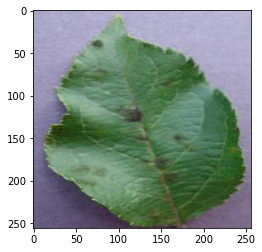

In [18]:
show_image(*train[0])

Label :Tomato___healthy(37)


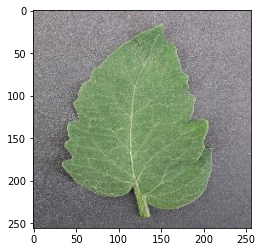

In [19]:
show_image(*train[70000])

Label :Peach___Bacterial_spot(16)


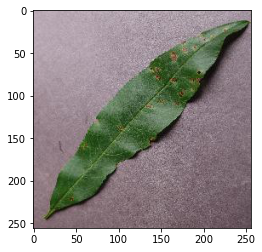

In [20]:
show_image(*train[30000])

In [21]:
# Setting the seed value
random_seed = 7
torch.manual_seed(random_seed)

In [22]:
# setting the batch size
batch_size = 32

In [23]:
# DataLoaders for training and validation
train_dl = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dl = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

- `DataLoader` is a subclass which comes from `torch.utils.data`. It helps in loading large and memory consuming datasets. It takes in `batch_size` which denotes the number of samples contained in each generated batch. 

- Setting `shuffle=True` shuffles the dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

- `num_workers`, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. Since, Kaggle provides a 2 core CPU, I have set it to 2


In [24]:

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available. GPU:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

True
NVIDIA GeForce RTX 3050 Laptop GPU
CUDA is available. GPU: NVIDIA GeForce RTX 3050 Laptop GPU


In [25]:
# helper function to show a batch of training instances
def show_batch(data):
    for images, labels in data:
        fig, ax = plt.subplots(figsize=(30, 30))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=8).permute(1, 2, 0))
        break

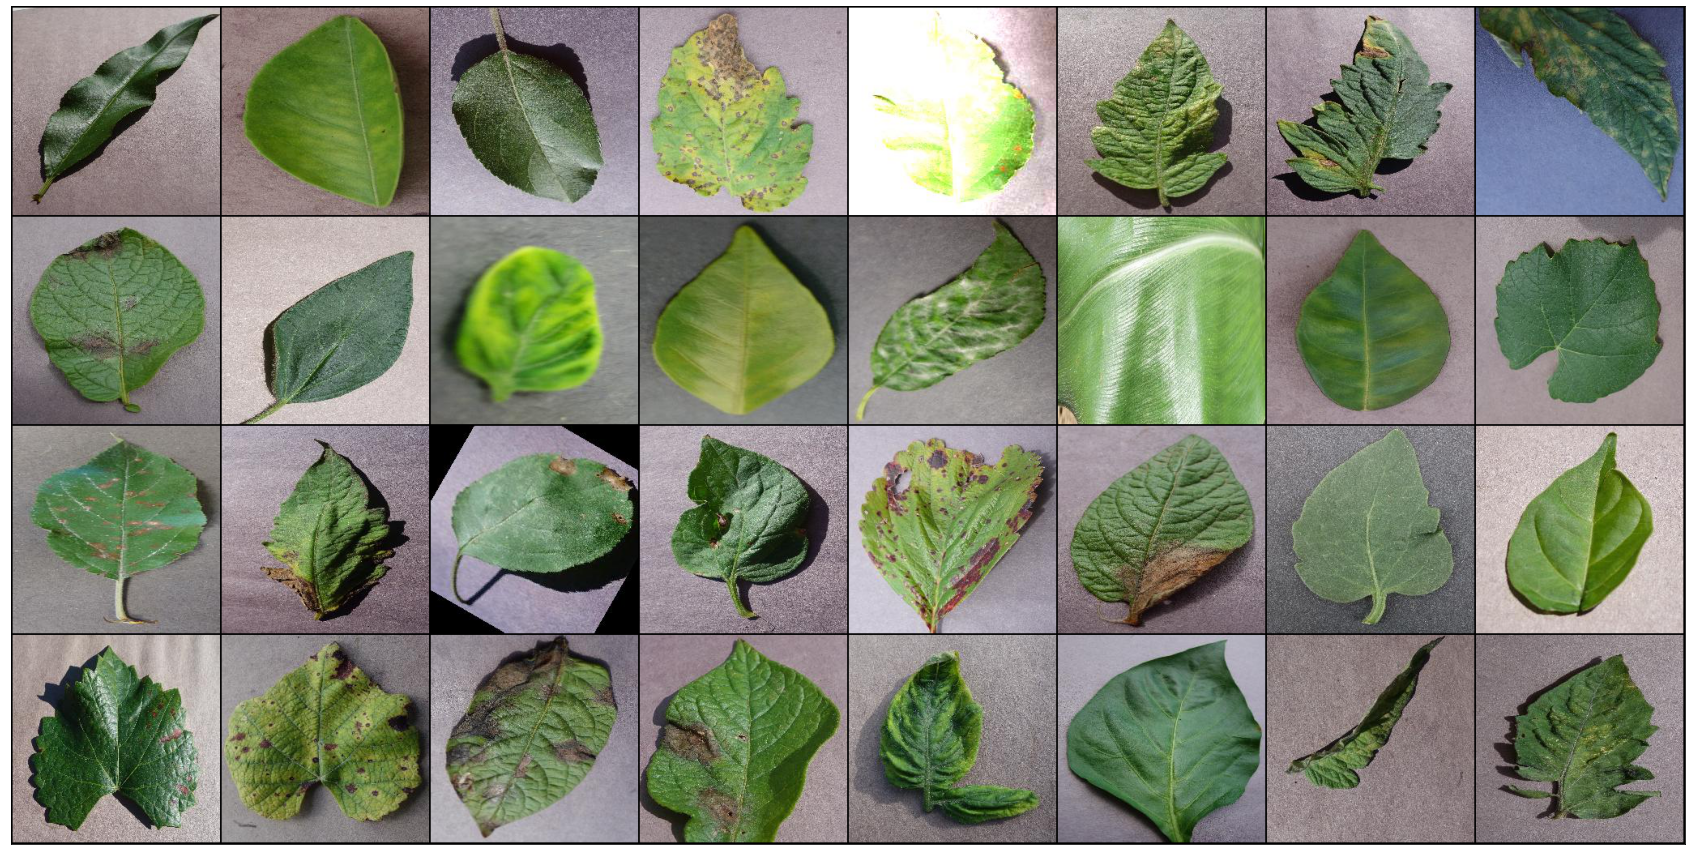

In [26]:
# Images for first batch of training
show_batch(train_dl) 

`batch_size` is the total number of images given as input at once in forward propagation of the CNN. Basically, batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.

# 🏗️ Modelling 🏗️

I recommend using a GPU instead of a CPU when working with image datasets. CPUs are designed for general-purpose tasks, while GPUs are optimized for training deep learning models because they can handle multiple computations simultaneously. GPUs have a large number of cores, which allows for better computation of parallel processes. Additionally, deep learning computations require handling large amounts of data, making a GPU's memory bandwidth more suitable.

To efficiently use a GPU, if available, I defined a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model and data to the GPU as needed.

#### Some helper functions

In [27]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Checking the device we are working with

In [28]:
device = get_default_device()
device

device(type='cuda')

Wrap up our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available)

In [29]:
# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

## Building the model architecture

If you want to learn more about ResNets read the following articles:
- [Understanding and Visualizing ResNets](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8#:~:text=ResNet%20Layers,layers%20remains%20the%20same%20%E2%80%94%204.)
- [Overview of ResNet and its variants](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)
- [Paper with code implementation](https://paperswithcode.com/method/resnet)

In ResNets, unlike in traditional neural networks, each layer feeds into the next layer, we use a network with residual blocks, each layer feeds into the next layer and directly into the layers about 2–3 hops away, to avoid over-fitting (a situation when validation loss stop decreasing at a point and then keeps increasing while training loss still decreases). This also helps in preventing [vanishing gradient problem](https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484) and allow us to train deep neural networks. Here is a simple residual block:

![image](https://www.mdpi.com/remotesensing/remotesensing-11-01896/article_deploy/html/images/remotesensing-11-01896-g001.png)

#### Residual Block code implementation

In [30]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

**Then we define our `ImageClassificationBase` class whose functions are:**

- `training_step` - To figure out how “wrong” the model is going after training or validation step.We are using this function other than just an accuracy metric that is likely not going to be differentiable (this would mean that the gradient can’t be determined, which is necessary for the model to improve during training)

A quick look at the PyTorch docs that yields the cost function: [cross_entropy](https://pytorch.org/docs/stable/nn.functional.html#cross-entropy).

- `validation_step` - Because an accuracy metric can’t be used while training the model, doesn’t mean it shouldn’t be implemented! Accuracy in this case would be measured by a threshold, and counted if the difference between the model’s prediction and the actual label is lower than that threshold.
- `validation_epoch_end` - We want to track the validation losses/accuracies and train losses after each epoch, and every time we do so we have to make sure the gradient is not being tracked.
- `epoch_end` - We also want to print validation losses/accuracies, train losses and learning rate too because we are using learning rate scheduler (which will change the learning rate after every batch of training) after each epoch.

We also define an `accuracy` function which calculates the overall accuracy of the model on an entire batch of outputs, so that we can use it as a metric in `fit_one_cycle`

In [31]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss  
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))
        

## Defining the final architecture of our model

In [32]:
# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)


# resnet architecture 
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out        

Now, we define a model object and transfer it into the device with which we are working...

In [33]:
# Checking the device we are working with
device = get_default_device()
print("Using device:", device)

# Moving data into GPU
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

# Defining the model and moving it to the GPU (or CPU)
model = to_device(ResNet9(3, len(train.classes)), device)
print(model)

Using device: cuda
ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (

*Getting a nicely formatted summary of our model (like in Keras). Pytorch doesn't support it natively. So, we need to install the `torchsummary` library (discussed earlier)*

In [34]:
# getting summary of the model
INPUT_SHAPE = (3, 256, 256)
print(summary(model.cuda(), (INPUT_SHAPE)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

# Training the model

Before we train the model, let's define a couple of utility functions. First, we'll create an `evaluate` function to handle the validation phase. Then, we'll implement a `fit_one_cycle` function to manage the entire training process. In `fit_one_cycle`, we'll use some advanced techniques to optimize our training.

- **Learning Rate Scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we’ll use is called the *“One Cycle Learning Rate Policy”*, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs.

- **Weight Decay**: We also use weight decay, which is a regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function. 

- **Gradient Clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping.

We'll also record the learning rate used for each batch.

In [35]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    

def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
            
    
        # validation
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history
    

Let's check our validation loss and accuracy

In [ ]:
%%time
history = [evaluate(model, valid_dl)]
history

Since there are randomly initialized weights, that is why accuracy come to near 0.0282 (that is 2.82% chance of getting the right answer or you can say model randomly chooses a class).
Now, declare some hyper parameters for the training of the model. We can change it if result is not satisfactory.

In [ ]:
epochs = 2
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history += fit_OneCycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=1e-4, 
                             opt_func=opt_func)

# 📈 Plotting 📈

#### Helper functions for plotting

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_accuracy'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
    
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

## Validation Accuracy

In [ ]:
plot_accuracies(history)

## Validation loss

In [ ]:
plot_losses(history)

## Learning Rate overtime

In [ ]:
plot_lrs(history)

# Saving the model

2. **Save/Load Entire Model**

This save/load process uses the most intuitive syntax and involves the least amount of code. Saving a model in this way will save the entire module using Python’s [pickle](https://docs.python.org/3/library/pickle.html) module. The disadvantage of this approach is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved. The reason for this is because pickle does not save the model class itself. Rather, it saves a path to the file containing the class, which is used during load time. Because of this, your code can break in various ways when used in other projects or after refactors.

In [ ]:
# saving the entire model to working directory
PATH = './plant-disease-model.pth'
torch.save(model, PATH)